# Homework 3: Random Variables and Their Distributions
***

**Name**: 

***

This assignment is due on Moodle by **5pm on Friday March 2nd**. Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.  Your solutions to computational questions should include any specified Python code and results as well as written commentary on your conclusions.  Remember that you are encouraged to discuss the problems with your instructors and classmates, but **you must write all code and solutions on your own**.  For a refresher on the course **Collaboration Policy** click [here](https://github.com/dblarremore/csci3022/blob/master/resources/syllabus.md#collaboration-policy).  

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda 3.6. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Because you can technically evaluate notebook cells is a non-linear order, it's a good idea to do Cell $\rightarrow$ Run All as a check before submitting your solutions.  That way if we need to run your code you will know that it will work as expected. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 

### Work only 4 of the 5 problems below! Your choice.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from scipy.special import binom
%matplotlib inline

### [25 points] Problem 1
***

Let $X$ be the lifespan (in years) of a BF Otterich Rugged Trail T/A tire under normal driving conditions, and suppose $X$ is described by the following probability density function: 

$$
f(x) = \left\{ 
\begin{array}{ll}
\dfrac{15}{c x^3} & 1 \leq x \leq 15 \\
0 & \textrm{otherwise}
\end{array}
\right.
$$

**Part A**: Determine the value of $c$ such that $f(x)$ is a valid PDF. 

$$\begin{align}
1 & = \int_1^{15}{\frac{15}{cx^3}dx} \\
& = \frac{15}{c} \int_1^{15}{x^{-3}dx} \\
& = \frac{15}{c} \bigg[\frac{-1}{2 x^2}\bigg]_1^{15} \\
& = \frac{15}{c} \bigg[\frac{-1}{2(15)^2} - \frac{-1}{2(1)^2}\bigg] \\
& = \frac{15}{c} \cdot \frac{112}{225} \\
1 & = \frac{112}{15c} \\
c & = \bf \frac{112}{15} \approx 7.467 \\
\end{align}$$

**Part B**: Compute the cumulative distribution function $F(y)$ for $X$. 

$$\begin{align}
F(y) & = \int_{1}^{y}{f(x)dx} \\
& = \frac{225}{112} \bigg[-\frac{1}{2y^2} + \frac12 \bigg] \\
\bf F(y) & = \bf -\frac{225}{112} \cdot \frac{1}{2y^2} + \frac{225}{224} \\
\end{align}$$

**Part C**: Use the cdf you computed in **Part B** to find the probability that a single tire goes longer than 5 years without failing. 

$$\begin{align}
F(5) & = -\frac{225}{112} \cdot \frac{1}{2(5)^2} + \frac{225}{224} \\
& = -\frac{225}{112} \cdot \frac{1}{50} + \frac{225}{224} \\
& = -\frac{9}{224} + \frac{225}{224} \\
F(5) & = \frac{27}{28} \approx 0.964 \\
1 - F(5) & = \bf \frac{1}{28} \approx 0.036 \\
\end{align}$$

**Part D**: Use the cdf you computed in **Part B** to determine the number of years within which $62.5\%$ of all tires will need to be replaced. In other words, determine the 62.5th percentile of the distribution of $X$. 

$$\begin{align}
\frac58 & = -\frac{225}{112} \cdot \frac{1}{2y^2} + \frac{225}{224} \\
-\frac{85}{224} & = -\frac{225}{112} \cdot \frac{1}{2y^2} \\
\frac{17}{90} & = \frac{1}{2y^2} \\
2y^2 & = \frac{90}{17} \\
y & = \bf \sqrt{\frac{45}{17}} \approx 1.627 \\
\end{align}$$

**Part E**: What is the probability that all four BF Otterich Rugged Trail T/A tires on a vehicle last longer than 5 years without failing? 

$$
(1-F(5))^4 = \bigg(\frac{1}{28}\bigg)^4 = \bf \frac{1}{614656} \approx 2 \cdot 10^{-6}
$$

### [25 points] Problem 2
***

You are a data-driven transportation engineer investigating the effect that a particular [vertical lift bridge](https://en.wikipedia.org/wiki/Vertical-lift_bridge) has on city traffic.  Every time a boat passes under the bridge, cars must stop while the bridge is raised to accommodate the height of the boat.  As both boat and car traffic increases, city planners are considering building a new taller bridge that will never impede the flow of traffic. As part of a larger simulation of traffic congestion, you need to decide how to model the arrival of boats at the bridge.  From your Intro to Data Science class you remember that the time _between_ independent arrivals are usually modeled by an Exponential distribution.  Finally, you have access to a report that says on average 10 boats cross under the bridge per day.

Answer the following questions about this scenario. **Note** that for **Parts B-D** you should clearly express the computation you're doing with math, but feel free to do any fancy function evaluations with Python. 

**Part A**:  Assuming the between-boat times do in-fact follow $Exp(10)$, what distribution would you expect the **number** of boats that cross under the bridge on a given day to follow?  What are the parameter(s) of the distribution? 

The number of boats crossing under the bridge during any given time follow a Poisson distribution with parameter $10$.

**Part B**:  What is the probability that 13 boats cross under the bridge on a particular day?

$$
X \sim Pos(10) \\
P(X = 13) = \frac{10^{13}}{13!} e^{-10} \\
$$

In [11]:
(10**13)/(np.math.factorial(13))*np.exp(-10)

0.072907946224436665

The probability of 13 boats going under the bridge is $\sim0.073$.

**Part C**:  What is the probability that 8 boats or fewer cross under the bridge on a particular day?

$$
P(X \leq 8) = \sum_{n=0}^8{\frac{10^n}{n!} e^{-10}} \\
$$

In [12]:
np.sum([(10**n)/(np.math.factorial(n))*np.exp(-10) for n in range(8)])

0.22022064660169896

The probability that 8 or fewer boats cross under the bridge is $\sim0.22$.

**Part D**: What is the probability that between 2 and 4 hours pass between two boat crossings? 

$$
Y \sim Exp(10) \\
P(2 \leq Y \leq 4) = F(4) - F(2) \\
F(Y) = \int_0^Y{f(x)}dx = \int_0^Y{10e^{-10x}}dx = 10 \int_0^Y{e^{-10x}}dx \\
F(Y) = \big[e^{-10x} \big]_0^Y = e^{-10Y} \\
F(4) - F(2) = e^{-40} + e^{-20} \bf\approx 2.06\times10^{-9} \\
$$

**Part F**: Write a function boat_count that takes as its sole argument the rate parameter $\lambda$ with units boats per day. Your function should simulate boat arrivals at the bridge by sampling between-boat times from $Exp(\lambda)$ via Numpy's [random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) function and return the number of boats that pass under the bridge on a single simulated day. 

**Note**: Do not change the API for this function. In other words, please keep the name of the function, its input parameter, and its desired output the same. Of course, the inner workings of this function and the actual value that it returns are in your hands!

In [27]:
def boat_count(lam):
    num_boats = 0
    t = 0
    while t < 1:
        t += np.random.exponential(1/lam)
        num_boats += 1
    return num_boats

In [28]:
boat_count(10)

9

**Part G**: Write a function boat_count_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of days to simulate. Your function should use the function you wrote in **Part F** to simulate many independent days of boat crossings and estimate the probability that 8 boats or fewer cross under the bridge on a particular day. For $\lambda = 10$, does your estimate agree with the by-hand computation you did in **Part C**?  

**Note**: Do not change the API for this function. 

In [34]:
def boat_count_sim(lam, num_days=int(1e3)):
    boat_counts = [boat_count(lam) for i in range(num_days)]
    less8 = 0
    for day in boat_counts:
        if day <= 8:
            less8 += 1
    return less8 / num_days

In [36]:
boat_count_sim(10, num_days=int(1e4))

0.2228

At $0.2228$, the simulated value is very close to my calculation of $0.2202$ for the probability that 8 or fewer boats pass under the bridge in a day.

**Part H**: Write a function boat_time_sim that takes as arguments the rate parameter $\lambda$ with units boats per day and an integer number of boat arrivals to simulate. Your function should sample boat arrivals via [np.random.exponential](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.random.exponential.html) and estimate the probability that boats arrive between 2 and 4 hours apart.  For $\lambda = 10$, does your estimate agree with the by-hand computation you did in **Part D**?  

**Note**: Do not change the API for this function.  

In [48]:
def boat_time_sim(lam, num_boats=int(1e3)): 
    wait_times = [np.random.exponential(1/lam) for i in range(num_boats)]
    range_count = 0
    for t in wait_times:
        if t*24 > 2 and t*24 < 4:
            range_count += 1
    return range_count / num_boats

In [49]:
boat_time_sim(10, num_boats=int(1e4))

0.2459

This simulated value of $0.2402$ does not match my calculated value of $\sim2.06\times10^{-9}$, which is strange because I'm pretty sure I (and by I, I mean my calculator) did the integral right and plugged everything in correctly. Can't win 'em all, I guess...

### [25 points] Problem 3 
***

Let $X =$ the leading digit of a randomly selected number from a large accounting
ledger. For example, if we randomly draw the number \$20,695, then $X = 2.$
People who make up numbers to commit accounting fraud tend to give $X$ a
(discrete) uniform distribution, i.e., $P(X = x) = \frac{1}{9}$, for $x \in \{1, ..., 9\}$. However,
there is empirical evidence that suggests that _naturally occurring_ numbers (e.g.,
numbers in a non-fraudulent accounting ledgers) have leading digits that do not
follow a uniform distribution. Instead, they follow a distribution defined by the following probability mass function:

$$
f(x) = \log_{10}\left( \frac{x+1}{x} \right) \quad \textrm{for } x = 1, 2, \ldots, 9
$$

**Part A**: Write a function pmf_natural that implements $f(x)$. Your function should take in an integer $x$ and return $f(x) = P(X = x)$.  Use your function to argue that $f(x)$ is a well-defined probability mass function. 

In [2]:
def pmf_natural(x):
    return np.log10((x+1)/x) 

In [3]:
sum = 0
for i in range(1,10):
    sum += pmf_natural(i)
print(sum)

1.0


$\sum_{i=1}^9{f(x)} = 1$, so $f(x)$ is a well-defined PMF.

**Part B**: Use the function you wrote above to make stacked bar plots describing the pmf of the naturally occurring numbers as well as the discrete uniform distribution.  Make sure that the $x$- and $y$-limits on your plots are the same so that the two distributions are easy to compare. 

Text(0,0.5,'Frequency')

/home/user/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1999: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


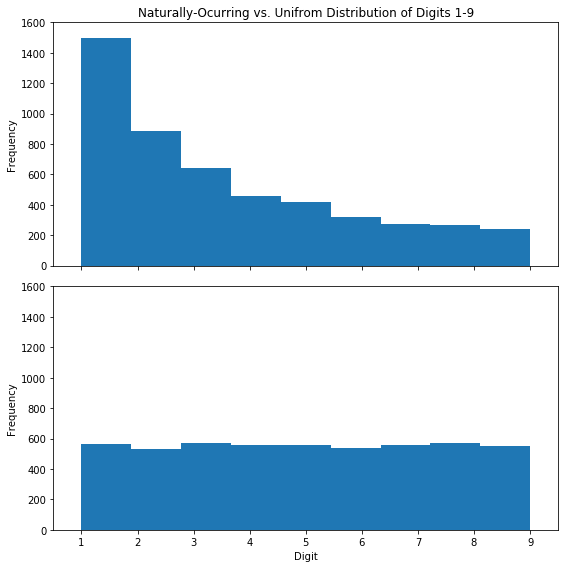

In [57]:
num_samples = int(5e3)
probs = [pmf_natural(x) for x in range(1,10)]
samples = np.random.choice(range(1,10), p=probs, size=num_samples)
natural = np.random.choice(range(1,10), size=num_samples)


fig, axs = plt.subplots(nrows=2, ncols=1, figsize=(8,8), tight_layout=True, sharex=True)
axs[0].hist(samples, bins=9)
axs[0].axis([0.5,9.5,0,1600])
axs[0].set_title("Naturally-Ocurring vs. Unifrom Distribution of Digits 1-9")
axs[0].set_ylabel("Frequency")

axs[1].hist(natural, bins=9)
axs[1].axis([0.5,9.5,0,1600])
axs[1].set_xlabel("Digit")
axs[1].set_ylabel("Frequency")

**Part C**: Write a function cdf_natural that implements the cumulative distribution function $F(y)$ for $X$ and use it to compute the probability that the leading digit in a number is at most 4 and at most 5. 

In [69]:
def cdf_natural(y):
    sum = 0
    y = 9 if y > 9 else y
    for i in range(1,y+1):
        sum += pmf_natural(i)
    return sum  

In [77]:
print("Probability that X <= 4: %.3f" % cdf_natural(4))
print("Probability that X <= 5: %.3f" % cdf_natural(5))

Probability that X <= 4: 0.699
Probability that X <= 5: 0.778


**Part D**: The data in tax_data.txt contains the taxable income for individuals in 1978. Use Pandas and the information from **Parts A-D** to determine whether or not the dataset is likely fraudulent.  In addition to code and any graphical summaries, make sure to clearly justify your conclusion in words. 

Text(0,0.5,'Frequency')

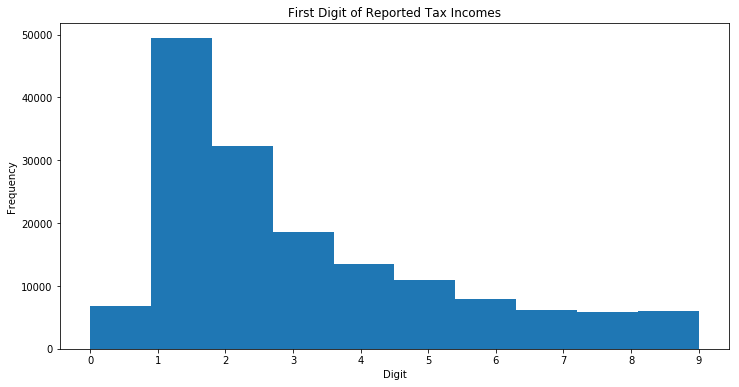

In [108]:
dfTax = pd.read_table("tax_data.txt")
dfTax["n1"] = dfTax["Tax Incomes"].astype(str).str[0]
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(dfTax["n1"])
ax.set_title("First Digit of Reported Tax Incomes")
ax.set_xlabel("Digit")
ax.set_ylabel("Frequency")

The distribution of the first digit of each reported income is clearly *not* a uniform distribution, and in fact closely resembles the given distribution for naturally-ocurring digits. Therefore, this dataset is most likely not fraudulent.

### [25 points] Problem 4
***

You are the team manager for the CU intramural Quidditch team, the Boulder Beaters, and you've just made it to the national championship series against the Stanford Snitching Snitches. The typical Quidditch championship is a best of 11 series, so the first team to win 6 matches is declared the winner.  Furthermore, based on a rigorous statistical analysis of regular season play, the probability that the Boulder Beaters win any one match against the Snitching Snitches is given by $p = 0.55$.  

**Part A**: What is the probability that you win the 11-game series on the 8th match played? 


$$\begin{align}
X \sim Bin(7, 0.55) \\
P(X = 8) & = \binom86 \cdot 0.55^6 \cdot (1-0.55)^{8-6} \\
& = \frac{8!}{6!2!} \cdot 0.55^6 \cdot 0.45^2 \\
& \approx 0.157 \\
\end{align}$$

**Part B**: What is the probability that you win the 11-game series in any valid number of matches? 

$$\begin{align}
F(X) & = \sum_{x=6}^{X}{f(y)} \\
& = \sum_{n=6}^{X}{\binom{n}{6} \cdot 0.55^6 \cdot (1-0.55)^{n-6}} \\
F(11) & = 0.55^6 \bigg(\binom{6}{6} \cdot 0.45^0 + \binom76 \cdot 0.45^1 + \binom86 \cdot 0.45^2 + \binom96 \cdot 0.45^3 + \binom{10}{6} \cdot 0.45^4 + \binom{11}{6} \cdot 0.45^5 \bigg) \\
& = 0.55^6 \big(1 \cdot 1 + 7 \cdot 0.45 + 28 \cdot 0.2025 + 84 \cdot 0.91125 + 210 \cdot 0.041006 + 462 \cdot 0.018453 \big) \\
& = 0.55^6 \cdot 34.611 \\
F(11) & \approx 0.958 \\
\end{align}$$

**Part C**: The winner of the champsionship will take home \$10,000 to use for equipment and victory parties in the following season. Because the stakes are so high, you've decided to hire a famous Quidditch consultant, Bludger Bob, to help you prepare for each match. With Bob's help your probability of winning any given match increases to $p = 0.7$.  Bludger Bob charges a fee of \$100 per game, but as a testament to his confidence in his abilities, only charges you the \$100 for games that you win and only if you win the series.  So, if you play a 11-game series and win you will take home \$10,000 less \$600 for Bludger Bob's fees, for a total payout of \$9,400.  What is the expected payout for an 11-game series?   

$$

$$

**Part D**: This year the National Intramural Quidditch Association (NIQA) is implementing an experimental rule.  As the team with the best record in the regular season you will get to choose the length of the championship series.  Specifically, you can choose the series length to be anywhere from $N=3, 5, 7, \ldots, 99$ games long.  Assuming that you plan to use Bludger Bob's services and considering the fact that you have a better than even chance of winning each game, explain the trade-offs between choosing a short series vs. a long series in terms of Expected Payout. 


**Part E**: Write a function optimal_series that takes in $p$, the probability that your team wins an individual game, then computes the Expected Payout for each series of length $N=3, 5, 7, \ldots 99$ and returns the optimal series length.  In addition to returning the optimal series length, your function should also produce a plot of Expected Payout vs Series Length. You may write any additional helper functions that you like, but you should not change the API for the function optimal_series. 

In [ ]:
def optimal_series(p):
    return 1

### [25 points] Problem 5
***

The card game "War" is fun for small children. The basic rules are [here](https://www.bicyclecards.com/how-to-play/war/), but see the list below. Assume that the value of each card in the deck, in decreasing order, is A K Q J 10 9 8 7 6 5 4 3 2. For example, Q is of higher value than J. 

Create a simulation of the game War. Your simulation must:

- initialize a single deck of 52 standard cards, shuffled.
- deal half of those cards to each player.
- simulate the game of War between two players until one player has all 52 cards, while recording the number of rounds that have passed.
- for counting purposes, a round ends when the winner places cards on the bottom of their stack. 
- if a player runs out of cards mid-War, that player loses. 
- when cards are collected to be placed at the bottom of a deck, they are scraped from the table in a way that randomly shuffles them.  

In [ ]:
def war_round(player1, player2, verbose=False):
    cards_p1 = [player1.pop()]
    cards_p2 = [player2.pop()]
    if verbose:
        print()
        print("Player 1 flopped a %d" % cards_p1[-1])
        print("Player 2 flopped a %d" % cards_p2[-1])
    if len(player1) == 0:
        player2.insert(0, np.random.shuffle(cards_p1 + cards_p2))
        return player1, player2
    elif len(player2) == 0:
        player1.insert(0, np.random.shuffle(cards_p1 + cards_p2))
        return player1, player2
    
    while cards_p1[-1] == cards_p2[-1]:
        for i in range(2):
            cards_p1.append(player1.pop())
            if len(player1) == 0:
                player2.insert(0, np.random.shuffle(cards_p1 + cards_p2))
                return player1, player2
            cards_p2.append(player2.pop())
            if len(player2) == 0:
                player1.insert(0, np.random.shuffle(cards_p1 + cards_p2))
                return player1, player2
            if i == 1 and verbose:
                print("P1: %d" % cards_p1[-1])
                print("p2: %d" % cards_p2[-1])
        
    if cards_p1[-1] > cards_p2[-1]:
        winnings = cards_p1 + cards_p2
        np.random.shuffle(winnings)
        for card in winnings:
            player1.insert(0, card)
    else:
        winnings = cards_p1 + cards_p2
        np.random.shuffle(winnings)
        for card in winnings:
            player2.insert(0, card)
    
    return player1, player2

In [287]:
def war_sim(deck=[14,13,12,11,10,9,8,7,6,5,4,3,2]*4, verbose=False):
    # Initialize deck
    np.random.shuffle(deck)
    
    # Deal cards
    player1 = deck[:26]
    player2 = deck[26:]
    
    # Simulate turns
    c = 1
    p1w = 0
    p2w = 0
    while len(player1) > 0 and len(player2) > 0:
        player1, player2 = war_round(player1, player2)
        if verbose:
            print()
            print("ROUND %d"%c)
            print("Player 1 has %2d cards left" % len(player1))
            print("Player 2 has %2d cards left" % len(player2))
        c += 1
    if len(player2) == 0:
        p1w += 1
        if verbose: print("Player 1 won after %d rounds!" % c)
    else:
        p2w += 2
        if verbose: print("Player 2 won after %d rounds!" % c)
    return c

In [289]:
war_sim()

333

**Part A**: For any fixed order of the cards, the game is completely non-random. This means that shuffling the deck randomly makes the duration of the game a random variable. Use your simulation to compute the expected value of the duration of a game of war. 

In [286]:
total_turns = 0
num_games = 1e4
for i in range(int(num_games)):
    total_turns += war_sim()
print(total_turns / num_games)

405.5193


**Part B**: What happens to the expected duration if the K, Q, and J cards are all now assumed to have _equal_ rank?

In [290]:
total_turns = 0
num_games = 1e4
for i in range(int(num_games)):
    total_turns += war_sim(deck=[14,11,11,11,10,9,8,7,6,5,4,3,2]*4)
print(total_turns / num_games)

292.2135


These games are considerably shorter than the normal rules because it forces players into War more often, meaning they lose larger numbers of cards at a time.

**Part C**: Suppose that before the game starts, Player 1 gives all of their 2s and 3s to Player 2, and Player 2 gives all their As and Ks to Player 1. Does this tend to make the game longer or shorter?

In [314]:
def war_sim_alt(deck=[14,13,12,11,10,9,8,7,6,5,4,3,2]*4, verbose=False):
    # Initialize deck
    np.random.shuffle(deck)
    
    # Deal cards
    player1 = deck[:26]
    player2 = deck[26:]
    
    k = 0
    while k < len(player1):
        if player1[k] == 2 or player1[k] == 3:
            card = player1.pop(k)
            player2.append(card)
            k -= 2
        k += 1
    k = 0
    while k < len(player2):
        if player2[k] == 14 or player2[k] == 13:
            card = player2.pop(k)
            player1.append(card)
            k -= 2
        k += 1
    
    np.random.shuffle(player1)
    np.random.shuffle(player2)
        
    
    # Simulate turns
    c = 1
    p1w = 0
    p2w = 0
    while len(player1) > 0 and len(player2) > 0:
        player1, player2 = war_round(player1, player2)
        if verbose:
            print()
            print("ROUND %d"%c)
            print("Player 1 has %2d cards left" % len(player1))
            print("Player 2 has %2d cards left" % len(player2))
        c += 1
    if len(player2) == 0:
        p1w += 1
        if verbose: print("Player 1 won after %d rounds!" % c)
    else:
        p2w += 2
        if verbose: print("Player 2 won after %d rounds!" % c)
    return c

In [315]:
total_turns = 0
num_games = 1e4
for i in range(int(num_games)):
    total_turns += war_sim_alt()
print(total_turns / num_games)

125.0461


These games are even shorter than the rules in part B because they give a serious advantage to player 1.